# 유방암 여부 진단 분류
---

__목표 :__ 건강 지표 featurem, 유방암 여부 True, False, 이진 분류 문제

# 0. 환경
* Window 10 (Local)
* scikit learn 0.23.2
* numpy 1.20.2
* conda 4.8.3

## 1. 필요한 모듈

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

## 2. 데이터 준비

In [2]:
breast_cancers = load_breast_cancer()

## 3. 데이터 이해하기

* Feature Data 지정하기

In [6]:
breast_cancers_data = breast_cancers.data 
print(breast_cancers_data)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


* Label Data 지정하기

In [9]:
breast_cancers_label = breast_cancers.target
print(breast_cancers_label)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

* Target Names 출력

In [11]:
print(breast_cancers.target_names)

['malignant' 'benign']


* 데이터 Discribe

In [13]:
breast_cancers.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

## 4. train, test 데이터 분리

In [14]:
# data = 8 : 2 / train : test ratio

X_train, X_test, y_train, y_test = train_test_split(breast_cancers_data,
                                                   breast_cancers_label,
                                                   test_size = 0.2,
                                                   random_state=16)

## 5. 다양한 모델로 학습시켜보기
* Decision Tree
* Random Forest
* SVM (Support Vector Machine)
* SGD (Stochastic Gradient Descent)
* Logistic Regression

In [15]:
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)

DT_y_pred = decision_tree.predict(X_test)

In [16]:
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)

RF_y_pred = random_forest.predict(X_test)

In [17]:
svm_model = svm.SVC()                     
svm_model.fit(X_train, y_train)

SVM_y_pred = svm_model.predict(X_test)

In [18]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)

SGD_y_pred = sgd_model.predict(X_test)

In [19]:
logistic_model = LogisticRegression(solver = 'liblinear')
logistic_model.fit(X_train, y_train)

LR_y_pred = logistic_model.predict(X_test)

* sklearn version 0.23.2에서 logistic regression을 사용할 때 버그 발생.
  * solver = 'liblinear'로 사용.

## 6. 모델 평가

### Decision Tree 평가

acc : 0.9649122807017544
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        41
           1       0.96      0.99      0.97        73

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

----------------------------------------------------------------------


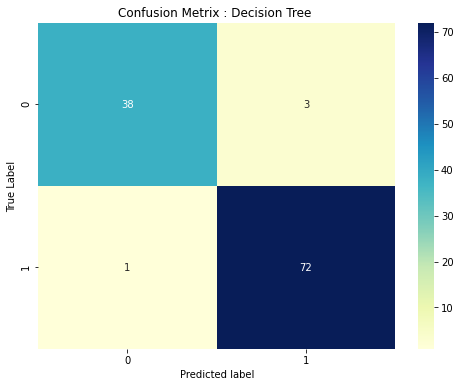

In [20]:
print('acc :',accuracy_score(y_test, DT_y_pred))
print('--'*35)
print(classification_report(y_test, DT_y_pred))
print('--'*35)
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, DT_y_pred)
sns.heatmap(cm, cmap="YlGnBu",annot=True, fmt="d")
plt.title("Confusion Metrix : Decision Tree ")
plt.ylabel('True Label')
plt.xlabel('Predicted label')
plt.show()

### Random Forest 평가

acc : 0.9736842105263158
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        41
           1       0.97      0.99      0.98        73

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

----------------------------------------------------------------------


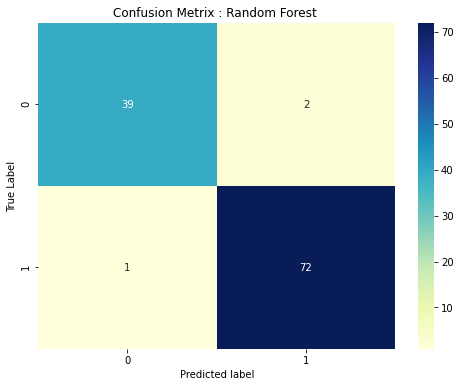

In [21]:
print('acc :',accuracy_score(y_test, RF_y_pred))
print('--'*35)
print(classification_report(y_test, RF_y_pred))
print('--'*35)
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, RF_y_pred)
sns.heatmap(cm, cmap="YlGnBu",annot=True, fmt="d")
plt.title("Confusion Metrix : Random Forest ")
plt.ylabel('True Label')
plt.xlabel('Predicted label')
plt.show()

### SVM (Support Vector Machine) 평가

acc : 0.8859649122807017
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.71      0.82        41
           1       0.86      0.99      0.92        73

    accuracy                           0.89       114
   macro avg       0.91      0.85      0.87       114
weighted avg       0.90      0.89      0.88       114

----------------------------------------------------------------------


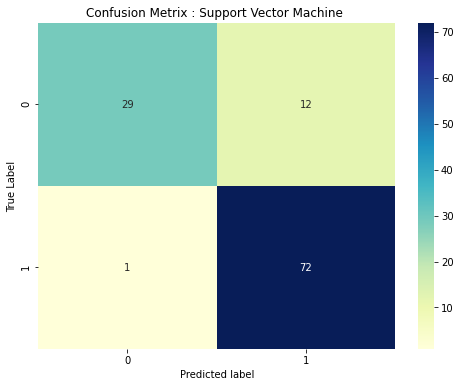

In [22]:
print('acc :',accuracy_score(y_test, SVM_y_pred))
print('--'*35)
print(classification_report(y_test, SVM_y_pred))
print('--'*35)
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, SVM_y_pred)
sns.heatmap(cm, cmap="YlGnBu",annot=True, fmt="d")
plt.title("Confusion Metrix : Support Vector Machine ")
plt.ylabel('True Label')
plt.xlabel('Predicted label')
plt.show()

### SGD (Stochastic Gradient Descent) 평가

acc : 0.8947368421052632
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.73      0.83        41
           1       0.87      0.99      0.92        73

    accuracy                           0.89       114
   macro avg       0.92      0.86      0.88       114
weighted avg       0.90      0.89      0.89       114

----------------------------------------------------------------------


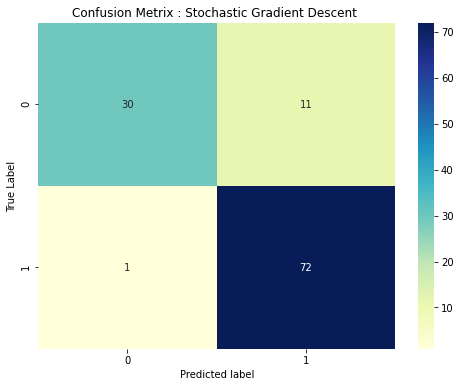

In [23]:
print('acc :',accuracy_score(y_test, SGD_y_pred))
print('--'*35)
print(classification_report(y_test, SGD_y_pred))
print('--'*35)
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, SGD_y_pred)
sns.heatmap(cm, cmap="YlGnBu",annot=True, fmt="d")
plt.title("Confusion Metrix : Stochastic Gradient Descent ")
plt.ylabel('True Label')
plt.xlabel('Predicted label')
plt.show()

### Logistic Regression 평가

acc : 0.9298245614035088
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.85      0.90        41
           1       0.92      0.97      0.95        73

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114

----------------------------------------------------------------------


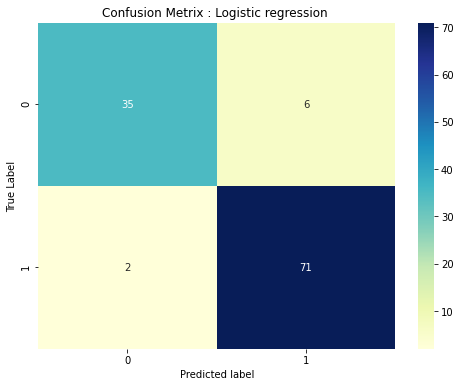

In [24]:
print('acc :',accuracy_score(y_test, LR_y_pred))
print('--'*35)
print(classification_report(y_test, LR_y_pred))
print('--'*35)
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, LR_y_pred)
sns.heatmap(cm, cmap="YlGnBu",annot=True, fmt="d")
plt.title("Confusion Metrix : Logistic regression ")
plt.ylabel('True Label')
plt.xlabel('Predicted label')
plt.show()

## 7. 정리

### 7.0 precision / recall / f1 score
* 이 문제는 이진 분류로 왼쪽 위부터 순서대로 TP, FN, FP, TN을 나타냄.
 * TP(True Positive)와 TN(True Negative)이 높기 때문에 암인지 아닌지를 높은 확률로 구분하고 있음을 알 수 있음.

### 7.1 confusion metrix
* SVM, SGD, Logistic Regression은 FN, FP이 많진 않지만 어느정도 있기에 Precision과 Recall에 영향을 미침(평균값이 떨어지는 이유)
     
### 7.2 생각
* 암을 완벽하게 구분해내지는 못함
* Random Forest(ensemble)가 5개의 모델 중에서 제일 분류가 잘됨.